In [2]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2
import math

In [3]:
# brought to you by Jobim, Debussy's la Mer, Sergio Sampaio
f = open("rf-model.pckl", 'rb')
model = pickle.load(f)
f.close()

In [4]:
%matplotlib inline

def calc_borders(dim):
    top = math.ceil((28 - dim[0]) / 2)
    bottom = math.floor((28 - dim[0]) / 2)
    left = math.ceil((28 - dim[1]) / 2)
    right = math.floor((28 - dim[1]) / 2)
    return top, bottom, left, right

def get_area(contour):
    '''
    gets (x,y) coords defining the smallest rectangular area completely enclosing
    the given contour
    '''
    x_min, y_min = contour[0]
    x_max, y_max = contour[0]
    for e in contour:
        if e[0] > x_max:
            x_max = e[0]
        elif e[0] < x_min:
            x_min = e[0]
        if e[1] > y_max:
            y_max = e[1]
        elif e[1] < y_min:
            y_min = e[1]

    return (x_min, y_min, x_max, y_max)

def preprocess(img_file):
    im = cv2.imread(img_file) 
    im = 255 - cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #mnist and opencv work with black backgrounds
    im2, contours, hierarchy = cv2.findContours(im, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    if len(contours) > 1:
        return "Please draw a single digit only. The background must be clear."
    
    # crop
    x_min, y_min, x_max, y_max = get_area(np.reshape(contours[0], (len(contours[0]),2)))
    im = im[y_min:y_max+1, x_min:x_max+1]
    
    # rescale
    if max(np.shape(im)) > 20:
        factor = 20.0 / max(np.shape(im))
        im = cv2.resize(im, dsize=(0,0), fx=factor, fy=factor, interpolation=cv2.INTER_AREA)
    
    # add padding around 
    top, bottom, left, right = calc_borders(np.shape(im))
    im = cv2.copyMakeBorder(src=im, top=top, bottom=bottom, left=left, right=right, 
                          borderType=cv2.BORDER_CONSTANT, value=0)

    return im

[5]


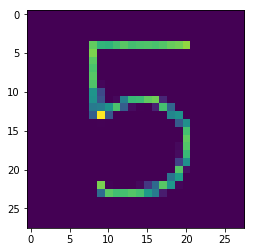

In [5]:
img = preprocess('5.png')
print(model.predict(img.reshape(1,-1)))
plt.imshow(img)
plt.show()

In [ ]:
pixels = get_pixels('1.png')
model.predict(pixels.reshape(1,-1))